In [29]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# 1. ĐỌC DỮ LIỆU VÀO CHƯƠNG TRÌNH

In [31]:
# Đọc tập tin dữ liệu với định dạng "xlsx"
df = pd.read_excel('Online Retail.xlsx')

In [32]:
# Hiển thị thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# 2. TIỀN XỬ LÝ DỮ LIỆU

In [33]:
# Thao tác làm sạch dữ liệu 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [34]:
# Xem thử 10 dòng đầu
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [35]:
# 3. XOÁ HOÁ ĐƠN GHI NỢ
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [36]:
# Xoá những hoá đơn tín dụng
df = df[~df['InvoiceNo'].str.contains('C')]

<AxesSubplot:>

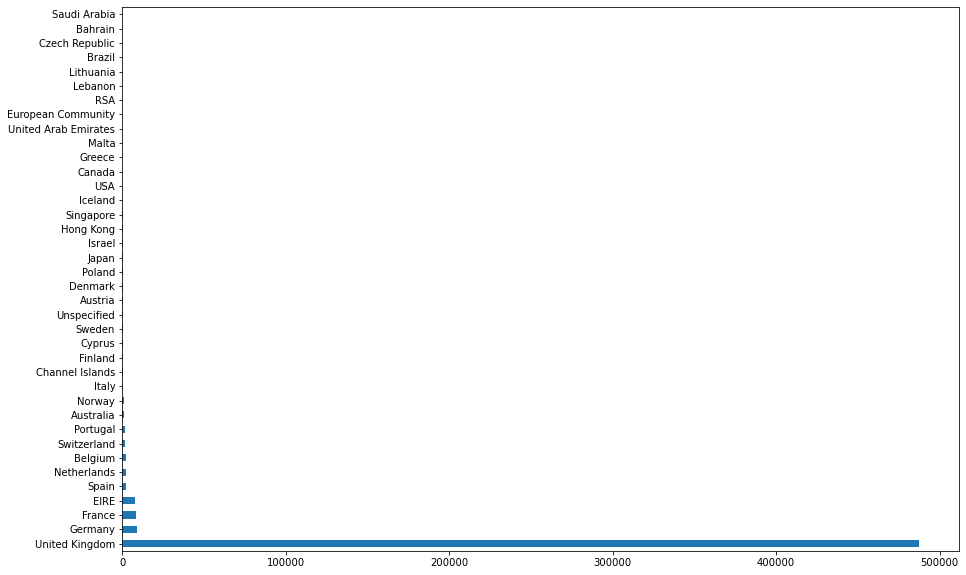

In [37]:
# 4. THỐNG KÊ SỐ DÒNG DỮ LIỆU THEO TỪNG QUỐC GIA
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [13]:
# 5. LẤY DỮ LIỆU HOÁ ĐƠN TỪ NƯỚC ANH 'UNITED KINGDOM'VÀ GOM NHÓM

In [38]:
# Chỉ xét các hoá đơn từ nước Anh và nhóm dữ liệu theo Số hoá đơn và Tên mặt hàng
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [15]:
# 6. CHUYỂN ĐỔI DỮ LIỆU VỀ DẠNG HOT ENCODING

In [39]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [40]:
# Xem dữ liệu sau khi chuyển về dạng hot encoding
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#7. CHUYỂN ĐỔI DỮ LIỆU TỪ DẠNG HOT ENCODING THÀNH ONE-HOT ENCODING

In [41]:
# Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) > 0 thành 1
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [42]:
# Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding
basket = basket.applymap(encode_data)

In [43]:
# 8. XOÁ CỘT 'POSTAGE'
basket.drop('POSTAGE', inplace=True, axis=1)

In [44]:
# 9. TÌM TẬP PHỔ BIẾN BẰNG THUẬT TOÁN APRIORI, min_sup=3%
itemsets = apriori(basket, min_support=0.03, use_colnames=True)

/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [45]:
itemsets.head(10)

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


In [46]:
# 10. TẠO LUẬT KẾT HỢP VỚI min_conf=50%

In [57]:
# Tạo luật kết hợp
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [48]:
# Xem thông tin về tập luật
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [49]:
# Chuyển đổi vế trái và vế phải từ kiểu object (fronzenset) về kiểu chuỗi (unicode)
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [50]:
# Viết lệnh in ra các luật đã tìm được
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==>', rules.loc[i, 'consequents'],
          ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE GREEN  ==> ALARM CLOCK BAKELIKE RED  [ 0.030160175711148016 ,  0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED  ==> ALARM CLOCK BAKELIKE GREEN  [ 0.030160175711148016 ,  0.6053763440860216 ]
GREEN REGENCY TEACUP AND SAUCER  ==> PINK REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND SAUCER  ==> GREEN REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.8207681365576103 ]
ROSES REGENCY TEACUP AND SAUCER  ==> GREEN REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==> ROSES REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7505353319057816 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==> JUMBO BAG RED RETROSPOT  [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==> JUMBO BAG RED RETROSPOT  [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==> JUMBO BAG RED RETROSPOT  [ 0.03519580007499866 ,  0.5798764342453663 ]
JUMBO ST

In [24]:
# 11. BIỂU DIỄN ĐỘ TIN CẬY, ĐỘ HỖ TRỢ CỦA TẬP LUẬT LÊN ĐỒ THỊ PHÂN TÁN

In [51]:
# Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật
support=rules['support'].values
confidence=rules['confidence'].values

<AxesSubplot:title={'center':'Association Rules'}, xlabel='support', ylabel='confidence'>

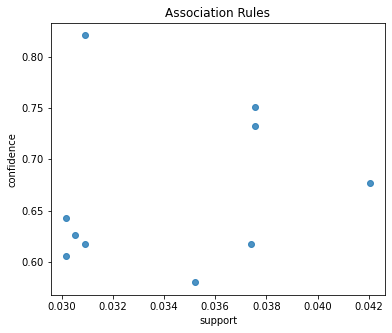

In [52]:
# Biểu diễn các thông tin này lên biểu đồ
plt.figure(figsize=(6,5))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [27]:
# 12. TÌM TẬP PHỔ BIẾN BẰNG THUẬT TOÁN APRIORI VỚI min_sup = 3%

In [53]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(basket, min_support=0.03, use_colnames=True)

/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [54]:
itemsets.head(10)

,support,itemsets
0,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.040071,(HOME BUILDING BLOCK WORD)
3,0.032517,(LOVE BUILDING BLOCK WORD)
4,0.030107,(DOORMAT NEW ENGLAND)
5,0.053517,(JAM MAKING SET WITH JARS)
6,0.060267,(PAPER CHAIN KIT 50'S CHRISTMAS)
7,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)
8,0.050463,(WOODEN FRAME ANTIQUE WHITE)
9,0.037714,(RED HANGING HEART T-LIGHT HOLDER)


In [58]:
# Tạo luật kết hợp
rules1 = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [59]:
rules1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [61]:
# Chuyển đổi vế trái và vế phải từ kiểu object (fronzenset) về kiểu chuỗi (unicode)
rules1["antecedents"] = rules1["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules1["consequents"] = rules1["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [62]:
# Viết lệnh in ra các luật đã tìm được
for i in range(len(rules1)):
    print(rules1.loc[i, 'antecedents'], ' ==>', rules1.loc[i, 'consequents'],
          ' [', rules1.loc[i, 'support'], ', ', rules1.loc[i, 'confidence'], ']')

JUMBO BAG PINK POLKADOT  ==> JUMBO BAG RED RETROSPOT  [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO STORAGE BAG SUKI  ==> JUMBO BAG RED RETROSPOT  [ 0.037392189425188835 ,  0.6176991150442478 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==> JUMBO BAG RED RETROSPOT  [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==> JUMBO BAG RED RETROSPOT  [ 0.03519580007499866 ,  0.5798764342453663 ]
ALARM CLOCK BAKELIKE GREEN  ==> ALARM CLOCK BAKELIKE RED  [ 0.030160175711148016 ,  0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED  ==> ALARM CLOCK BAKELIKE GREEN  [ 0.030160175711148016 ,  0.6053763440860216 ]
ROSES REGENCY TEACUP AND SAUCER  ==> GREEN REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==> ROSES REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7505353319057816 ]
GREEN REGENCY TEACUP AND SAUCER  ==> PINK REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND 

In [63]:
# 11. BIỂU DIỄN ĐỘ TIN CẬY, ĐỘ HỖ TRỢ CỦA TẬP LUẬT LÊN ĐỒ THỊ PHÂN TÁN

In [64]:
# Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật
support=rules1['support'].values
confidence=rules1['confidence'].values

<AxesSubplot:title={'center':'Association Rules'}, xlabel='support', ylabel='confidence'>

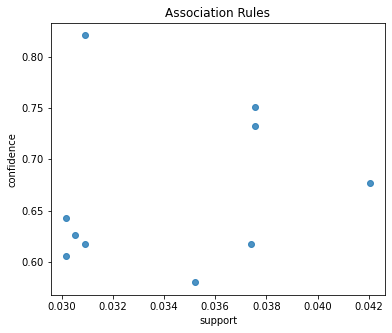

In [65]:
# Biểu diễn các thông tin này lên biểu đồ
plt.figure(figsize=(6,5))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)